# HOMEWORK 8

In this homework you are going to implement your first machine learning algorithm to automatically binarize document images. The goal of document binarization is to seprate the characters (letters) from everything else. This is the crucial part for automatic document understanding and information extraction from the . In order to do so, you will use the Otsu thresholding algorithm.

At the end of this notebook, there are a couple of questions for you to answer.

In [2]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the document image we will be working on in this homework.

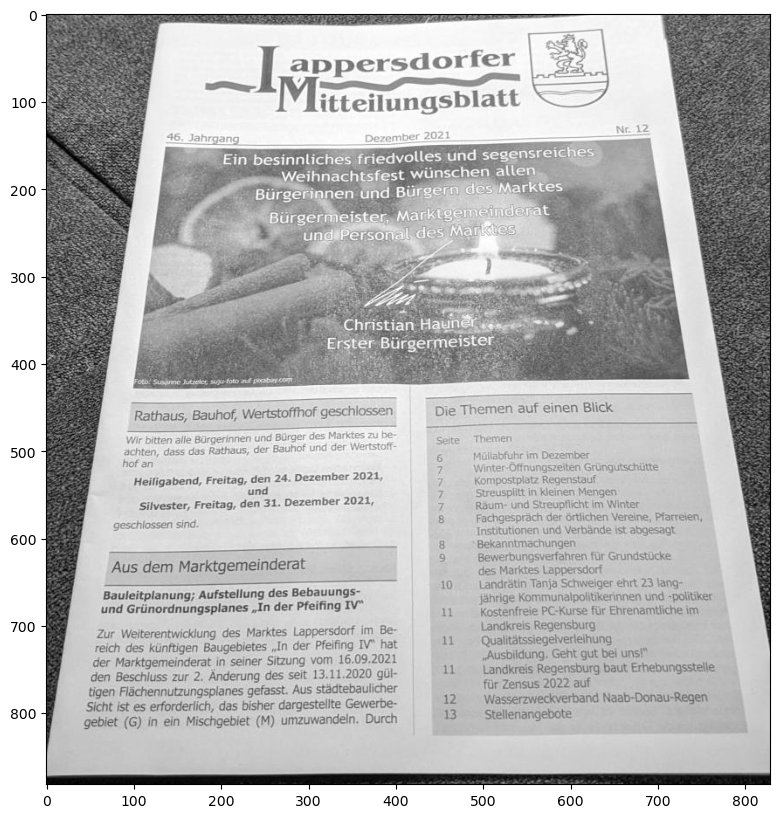

In [3]:
img = cv2.imread('../data/document.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

First, let's have a look at the histogram.

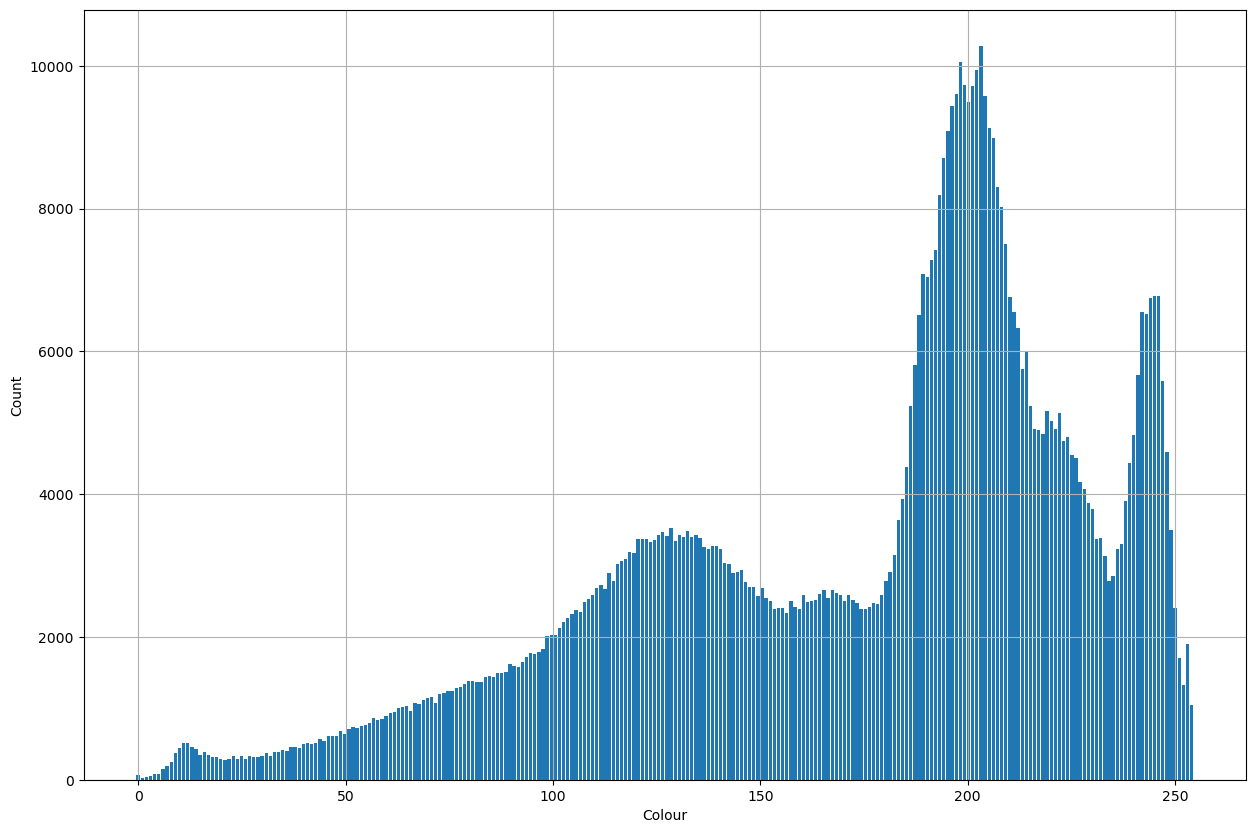

In [4]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

### Otsu Thresholding

Let's now implement the Otsu thresholding algorithm. Remember that the algorithm consists of an optimization process that finds the thresholds that minimizes the intra-class variance or, equivalently, maximizes the inter-class variance.

In this homework, you are going to demonstrate the working principle of the Otsu algorithm. Therefore, you won't have to worry about an efficient implementation, we are going to use the brute force approach here.

In [16]:
# Get image dimensions
rows, cols = img.shape
# Compute the total amount of image pixels
num_pixels = rows*cols

# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 256):
    # Extract the image pixels corresponding to the background
    foreground = img[img >= th]
    # Extract the image pixels corresponding to the background
    background = img[img < th]
    
    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue
    
    # Compute class-weights (omega parameters) for foreground and background
    omega_f = len(foreground) / num_pixels
    omega_b = len(background) / num_pixels
    
    # Compute pixel variance for foreground and background
    # Hint: Check out the var function from numpy ;-)
    # https://numpy.org/doc/stable/reference/generated/numpy.var.html
    sigma_f = np.var(foreground)
    sigma_b = np.var(background)
    
    # Compute the within-class variance
    wcv = omega_f*sigma_f + omega_b*sigma_b
    print("trace:", wcv, th, opt_th)
    
    # Perform the optimization
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th
        
# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold', opt_th)

trace: 2968.425559840757 1 None
trace: 2967.518116270807 2 1
trace: 2965.846319050196 3 2
trace: 2963.790615739324 4 3
trace: 2960.842095912133 5 4
trace: 2957.454876782211 6 5
trace: 2951.5756840178174 7 6
trace: 2943.915618771543 8 7
trace: 2934.4011801264355 9 8
trace: 2920.551870225766 10 9
trace: 2903.913439590568 11 10
trace: 2884.9512602152727 12 11
trace: 2865.975460549772 13 12
trace: 2849.477515391607 14 13
trace: 2833.912417760575 15 14
trace: 2821.4833291605073 16 15
trace: 2808.0504277779255 17 16
trace: 2796.2885620620477 18 17
trace: 2785.4488848240403 19 18
trace: 2774.908288541256 20 19
trace: 2765.126846624717 21 20
trace: 2756.0236219840795 22 21
trace: 2746.5818824976545 23 22
trace: 2736.0453848080556 24 23
trace: 2726.7771935280184 25 24
trace: 2716.3513166469093 26 25
trace: 2707.2578374857385 27 26
trace: 2697.2516918378797 28 27
trace: 2687.765469054604 29 28
trace: 2678.197915631973 30 29
trace: 2668.5537483269914 31 30
trace: 2657.744325339143 32 31
trace: 26

Finally, let's compare the original image and its thresholded representation.

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x2b3316ee700>)

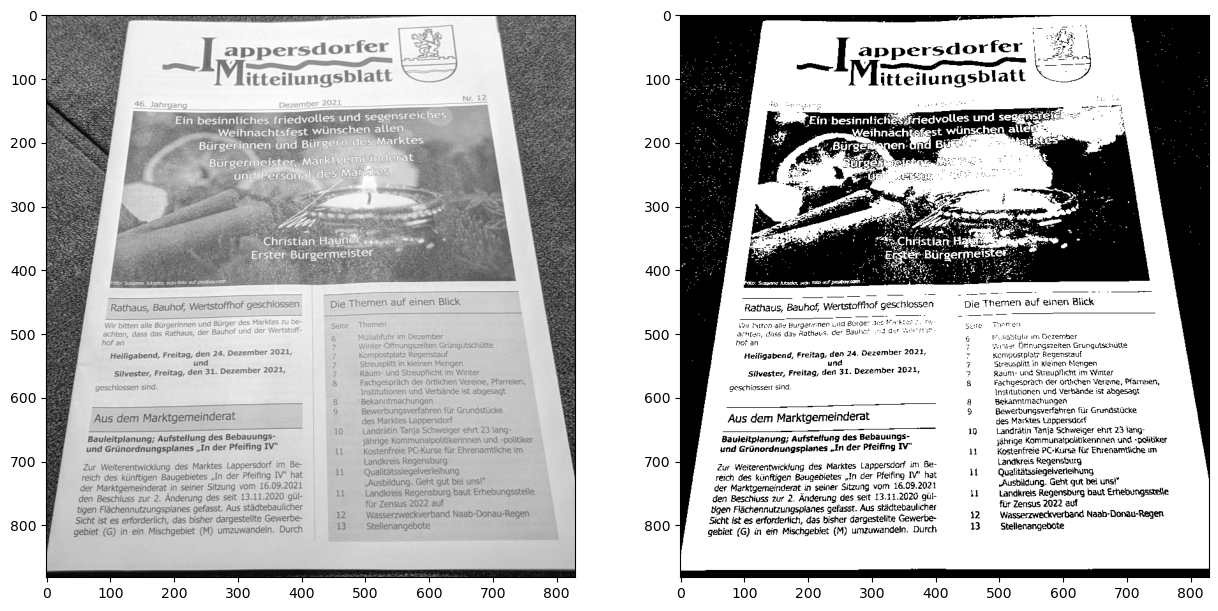

In [17]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')

### Questions

* Looking at the computed histogram, could it be considered bimodal?
* Looking at the computed histogram, what binarization threshold would you chose? Why?
* Looking at the resulting (thresholded) image, is the text binarization (detection) good?

In [ ]:
# Looking at the computed histogram, could it be considered bimodal?
# Нет, там отсутствуют отрицательние значения

# Looking at the computed histogram, what binarization threshold would you chose? Why?
# приблизительно 170, график пошол круто вверх, виглядит как threshold

# Looking at the resulting (thresholded) image, is the text binarization (detection) good?
# не очень, есть места где текст очень светлий